In [173]:
final_train['price_segment'].value_counts().sort_values(ascending = True)

Premium       448390
Budget        679161
Mainstream    700041
Name: price_segment, dtype: int64

In [174]:
final_train['lifstage_segment'].value_counts().sort_values(ascending = True)

Midage Singles/Couples    171542
Older Families            199215
New Families              209163
Young Singles/Couples     233924
Retirees                  266508
Older Singles/Couples     349667
Young Families            397573
Name: lifstage_segment, dtype: int64

In [176]:
# To avoid duplicate and explore more detailed segment, delete the price_lifestage_segment!!!先不删
final_train.drop(columns=['price_lifestage_segment'], inplace = True)
final_test.drop(columns=['price_lifestage_segment'], inplace = True)

In [177]:
#reference: https://sparkbyexamples.com/pandas/pandas-extract-month-and-year-separately-from-datetime-column/
final_train['year'] = final_train['financial_week_end_date'].dt.strftime('%Y')
final_train['year']

0          2023
1          2022
2          2023
3          2023
4          2021
           ... 
1827587    2021
1827588    2022
1827589    2022
1827590    2022
1827591    2023
Name: year, Length: 1827592, dtype: object

In [178]:
final_train['month'] = final_train['financial_week_end_date'].dt.strftime('%m')
final_train['month']

0          03
1          01
2          03
3          01
4          11
           ..
1827587    07
1827588    12
1827589    02
1827590    12
1827591    01
Name: month, Length: 1827592, dtype: object

In [180]:
final_train.drop(columns=['financial_week_end_date'], inplace = True)
final_train.columns

Index(['sales_channel', 'customer_state', 'total_sale_value_x',
       'price_segment', 'lifstage_segment', 'log_totalvalue', 'store_state',
       'co_location_flag', 'distance_to_kmart', 'distance_to_target',
       'media_amount_spend', 'Median income', 'population_2021',
       'same_area_shopping', 'year', 'month'],
      dtype='object')

In [181]:
final_test['year'] = final_test['financial_week_end_date'].dt.strftime('%Y')
final_test['year']

0         2022
1         2022
2         2023
3         2021
4         2022
          ... 
365513    2021
365514    2023
365515    2022
365516    2023
365517    2023
Name: year, Length: 365518, dtype: object

In [182]:
final_test['month'] = final_test['financial_week_end_date'].dt.strftime('%m')
final_test['month']

0         07
1         04
2         01
3         11
4         10
          ..
365513    12
365514    04
365515    03
365516    03
365517    01
Name: month, Length: 365518, dtype: object

In [183]:
final_test.drop(columns=['financial_week_end_date'], inplace = True)
final_test.columns

Index(['sales_channel', 'customer_state', 'total_sale_value_x',
       'price_segment', 'lifstage_segment', 'store_state', 'co_location_flag',
       'distance_to_kmart', 'distance_to_target', 'media_amount_spend',
       'Median income', 'population_2021', 'same_area_shopping', 'year',
       'month'],
      dtype='object')

In [184]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827592 entries, 0 to 1827591
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   sales_channel       object 
 1   customer_state      object 
 2   total_sale_value_x  float64
 3   price_segment       object 
 4   lifstage_segment    object 
 5   log_totalvalue      float64
 6   store_state         object 
 7   co_location_flag    bool   
 8   distance_to_kmart   object 
 9   distance_to_target  object 
 10  media_amount_spend  float64
 11  Median income       float64
 12  population_2021     float64
 13  same_area_shopping  bool   
 14  year                object 
 15  month               object 
dtypes: bool(2), float64(5), object(9)
memory usage: 212.6+ MB


In [185]:
final_train['year'] = final_train['year'].astype(int)
final_train['month'] = final_train['month'].astype(int)
final_test['year'] = final_test['year'].astype(int)
final_test['month'] = final_test['month'].astype(int)

In [186]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827592 entries, 0 to 1827591
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   sales_channel       object 
 1   customer_state      object 
 2   total_sale_value_x  float64
 3   price_segment       object 
 4   lifstage_segment    object 
 5   log_totalvalue      float64
 6   store_state         object 
 7   co_location_flag    bool   
 8   distance_to_kmart   object 
 9   distance_to_target  object 
 10  media_amount_spend  float64
 11  Median income       float64
 12  population_2021     float64
 13  same_area_shopping  bool   
 14  year                int32  
 15  month               int32  
dtypes: bool(2), float64(5), int32(2), object(7)
memory usage: 198.7+ MB


In [187]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365518 entries, 0 to 365517
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   sales_channel       365518 non-null  object 
 1   customer_state      365518 non-null  object 
 2   total_sale_value_x  365518 non-null  float64
 3   price_segment       365518 non-null  object 
 4   lifstage_segment    365518 non-null  object 
 5   store_state         365518 non-null  object 
 6   co_location_flag    365518 non-null  bool   
 7   distance_to_kmart   365518 non-null  object 
 8   distance_to_target  365518 non-null  object 
 9   media_amount_spend  365518 non-null  float64
 10  Median income       365518 non-null  float64
 11  population_2021     365518 non-null  float64
 12  same_area_shopping  365518 non-null  bool   
 13  year                365518 non-null  int32  
 14  month               365518 non-null  int32  
dtypes: bool(2), float64(4), int32(2), 

### 3.4 Dealing with Categorical Variables

In [188]:
cate_col = ['sales_channel', 'customer_state','price_segment', 'lifstage_segment','store_state', 'distance_to_kmart','distance_to_target']

In [189]:
final_train.replace
final_train.replace({True: 1, False: 0}, inplace = True)
final_test.replace({True: 1, False: 0}, inplace = True)

In [190]:
#get dummy table
dummy_train = pd.get_dummies(final_train, columns = cate_col, drop_first = True)
dummy_train

,total_sale_value_x,log_totalvalue,co_location_flag,media_amount_spend,Median income,population_2021,same_area_shopping,year,month,sales_channel_Digital - Delivery,...,store_state_VIC,store_state_WA,distance_to_kmart_3-5 KM,distance_to_kmart_<1 KM,distance_to_kmart_>5 KM,distance_to_kmart_Same Centre,distance_to_target_3-5 KM,distance_to_target_<1 KM,distance_to_target_>5 KM,distance_to_target_Same Centre
0,6691.29,8.808562,1,0.000000e+00,813.0,8072163.0,1,2023,3,0,...,0,0,0,0,1,0,0,0,1,0
1,364.53,5.898609,0,7.206251e+05,803.0,6503491.0,0,2022,1,0,...,1,0,0,0,0,0,0,0,0,1
2,446.25,6.100879,1,0.000000e+00,787.0,5156138.0,0,2023,3,0,...,0,0,0,0,0,1,0,0,0,1
3,7479.89,8.919973,1,3.469235e+04,734.0,1781516.0,1,2023,1,0,...,0,0,0,0,1,0,0,0,1,0
4,6172.44,8.727850,1,5.625606e+06,803.0,6503491.0,1,2021,11,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827587,710.79,6.566377,1,8.355683e+04,787.0,5156138.0,0,2021,7,0,...,0,0,0,0,0,1,0,0,0,1
1827588,2064.05,7.632425,1,1.130241e+05,848.0,2660026.0,0,2022,12,0,...,0,1,0,0,0,1,1,0,0,0
1827589,1795.17,7.492855,1,7.852145e+04,848.0,2660026.0,0,2022,2,0,...,0,1,0,0,1,0,0,0,1,0
1827590,2141.80,7.669402,1,3.766215e+05,813.0,8072163.0,0,2022,12,0,...,0,0,0,0,0,1,0,0,1,0


In [191]:
#get dummy table
dummy_test = pd.get_dummies(final_test, columns = cate_col, drop_first = True)
dummy_test

,total_sale_value_x,co_location_flag,media_amount_spend,Median income,population_2021,same_area_shopping,year,month,sales_channel_Digital - Delivery,sales_channel_Store,...,store_state_VIC,store_state_WA,distance_to_kmart_3-5 KM,distance_to_kmart_<1 KM,distance_to_kmart_>5 KM,distance_to_kmart_Same Centre,distance_to_target_3-5 KM,distance_to_target_<1 KM,distance_to_target_>5 KM,distance_to_target_Same Centre
0,599.62,1,2.799378e+04,734.0,1781516.0,0,2022,7,0,1,...,0,0,0,0,0,1,0,0,0,1
1,1733.01,1,3.981080e+05,734.0,1781516.0,0,2022,4,0,1,...,0,0,0,0,0,0,0,0,0,0
2,894.80,1,6.042893e+04,734.0,1781516.0,0,2023,1,0,1,...,0,0,0,0,0,1,1,0,0,0
3,2687.72,1,5.625606e+06,803.0,6503491.0,1,2021,11,0,1,...,1,0,0,0,0,1,0,0,1,0
4,530.78,1,1.836416e+05,787.0,5156138.0,0,2022,10,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365513,15227.36,0,4.383520e+05,813.0,8072163.0,1,2021,12,0,1,...,0,0,0,0,1,0,0,0,1,0
365514,1210.86,1,0.000000e+00,848.0,2660026.0,0,2023,4,0,1,...,0,1,0,0,0,1,0,0,0,1
365515,3031.11,1,7.402553e+03,1203.0,454499.0,0,2022,3,0,1,...,0,0,0,0,0,1,0,0,1,0
365516,8690.64,1,6.013005e+04,803.0,6503491.0,1,2023,3,0,1,...,1,0,0,0,0,1,0,0,1,0


In [193]:
#dummy_train['log_sale'] = np.log(dummy_train['total_sale_value_x'])
dummy_test['log_totalvalue'] = np.log(dummy_test['total_sale_value_x'])

In [195]:
dummy_train.corr()['log_totalvalue'].sort_values(ascending = False).round(2).iloc[2:,].head(10)

same_area_shopping                 0.42
lifstage_segment_Young Families    0.15
distance_to_kmart_>5 KM            0.12
month                              0.08
store_state_NSW                    0.08
customer_state_NSW                 0.07
population_2021                    0.07
distance_to_target_>5 KM           0.06
lifstage_segment_New Families      0.04
distance_to_target_<1 KM           0.03
Name: log_totalvalue, dtype: float64

## 4. Model Building

### 4.1 Train Valid Split

In [196]:
# Randomly split indexes
index_train, index_valid  = train_test_split(np.array(dummy_train.index), train_size = 0.8, random_state = 42)

# Write training and validation sets
train = dummy_train.loc[index_train,:].copy()
valid =  dummy_train.loc[index_valid,:].copy()

X_train = train.drop(['total_sale_value_x', 'log_totalvalue'], axis = 1)
X_valid = valid.drop(['total_sale_value_x', 'log_totalvalue'], axis = 1)

y_train= train['log_totalvalue']
y_valid = valid['log_totalvalue']
y_valid_original =  valid['total_sale_value_x']


print('Train:', X_train.shape)
print('Test:', X_valid.shape)

Train: (1462073, 40)
Test: (365519, 40)


### 4.2 Models

In [197]:
rmse_list = []
rmsle_list = []
models = []

### 4.2.1 Linear Model

#### 4.2.1.1 Linear Regression

In [198]:
# basic model

ols_full = LinearRegression()
ols_full.fit(X_train, y_train)

LinearRegression()

In [199]:
ols_full.coef_

array([ 8.03605160e-03, -1.04482005e-08, -1.25841513e-03, -6.09851262e-08,
        1.17135295e+00,  6.08727505e-02,  3.21507910e-02,  7.37140055e-02,
        8.20172732e-01, -8.61768666e-02, -2.39271788e-01,  1.61359958e-01,
       -3.95718820e-01, -5.22665242e-01,  9.94594621e-01, -1.75191416e-01,
        3.89116461e-02, -5.27738926e-02, -3.58453043e-01,  3.68265969e-01,
        2.11950803e-01,  3.67117736e-01,  1.39712238e-01,  5.98230603e-01,
        3.89624988e-02,  3.14006890e-01,  1.23095938e-01,  3.63809101e-01,
        1.84515877e-02, -1.48929077e+00,  1.16087727e-01, -1.65799000e-01,
       -7.58481861e-02, -5.57309515e-02,  2.27841568e-02, -1.59107059e-01,
       -4.45759104e-03,  4.38709464e-02,  1.37910761e-02, -4.06151659e-02])

In [200]:
X_train.columns

Index(['co_location_flag', 'media_amount_spend', 'Median income',
       'population_2021', 'same_area_shopping', 'year', 'month',
       'sales_channel_Digital - Delivery', 'sales_channel_Store',
       'customer_state_NSW', 'customer_state_NT', 'customer_state_Other',
       'customer_state_QLD', 'customer_state_SA', 'customer_state_TAS',
       'customer_state_VIC', 'customer_state_WA', 'price_segment_Mainstream',
       'price_segment_Premium', 'lifstage_segment_New Families',
       'lifstage_segment_Older Families',
       'lifstage_segment_Older Singles/Couples', 'lifstage_segment_Retirees',
       'lifstage_segment_Young Families',
       'lifstage_segment_Young Singles/Couples', 'store_state_NSW',
       'store_state_NT', 'store_state_QLD', 'store_state_SA',
       'store_state_TAS', 'store_state_VIC', 'store_state_WA',
       'distance_to_kmart_3-5 KM', 'distance_to_kmart_<1 KM',
       'distance_to_kmart_>5 KM', 'distance_to_kmart_Same Centre',
       'distance_to_target_3-5

In [201]:
ols_table_c = coef_table(ols_full, X_train.columns)
ols_table_c

,coef
co_location_flag,0.008
media_amount_spend,-0.0
Median income,-0.001
population_2021,-0.0
same_area_shopping,1.171
year,0.061
month,0.032
sales_channel_Digital - Delivery,0.074
sales_channel_Store,0.82
customer_state_NSW,-0.086


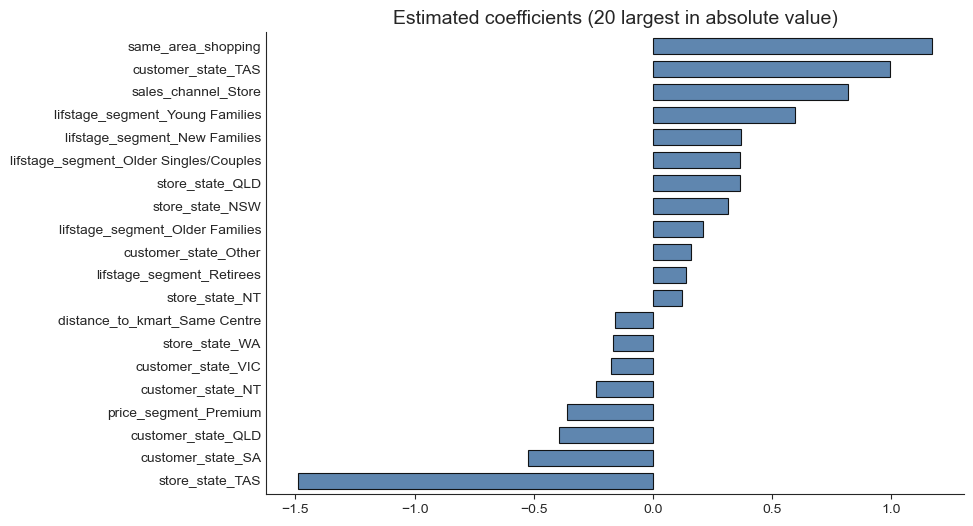

In [202]:
#predictors = cate_col + ['media_amount_spend',	'Median income',	'population_2021',	'year',	'month']
coefplot(ols_full, X_train.columns)
plt.savefig('lr_c.png')
plt.show()

In [203]:
ols_predict = ols_full.predict(X_valid)

In [204]:
ols_rmse = np.sqrt(mse(y_valid_original, np.exp(ols_predict)))
ols_rmsle = np.sqrt(msle(y_valid, ols_predict))

models.append('LinearRegression')
rmse_list.append(ols_rmse)
rmsle_list.append(ols_rmsle)

print('RMSE: {:.3f}'.format(ols_rmse))
print('RMSLE: {:.3f}'.format(ols_rmsle))

RMSE: 2503.524
RMSLE: 0.105


In [205]:
ols_table =eva_metric(models, rmse_list, rmsle_list)
ols_table

,RMSE,RMSLE
LinearRegression,2503.524,0.105


#### 4.2.1.2 Lasso Regression

In [206]:
#tutorial7

X_train_l = X_train.to_numpy()
y_train_l = X_train.to_numpy()

X_valid_l = X_valid.to_numpy()
y_valid_l = y_valid.to_numpy()
y_valid_l_original = y_valid_original.to_numpy()

scaler = StandardScaler()
scaler.fit(X_train_l)

X_train_l = scaler.transform(X_train_l)
X_valid_l = scaler.transform(X_valid_l)


In [207]:
alphas_l = np.linspace(0, 50, 10)

Alpha: 0.000
RMSE: 2503.519
RMSLE: 0.105
CPU times: total: 32min 40s
Wall time: 6min 35s


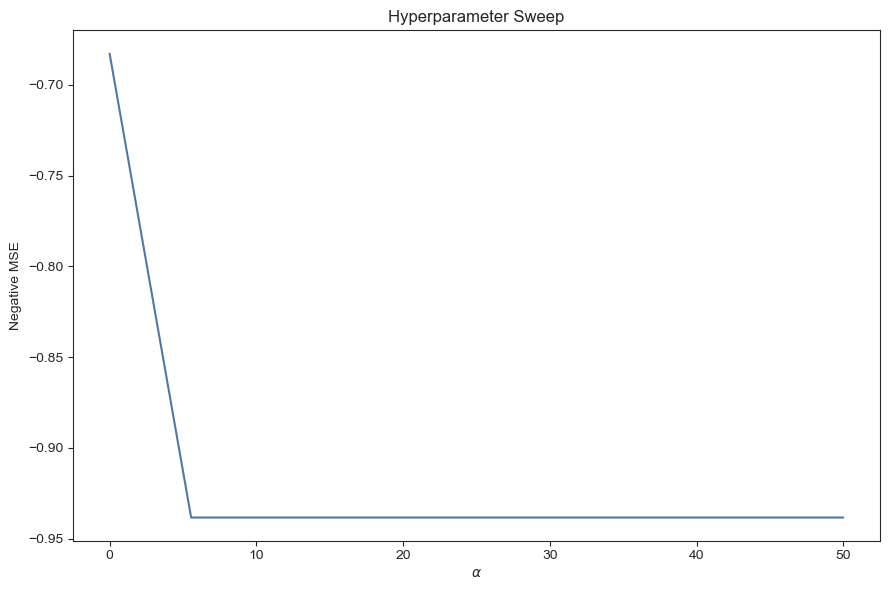

In [208]:

%%time
neg_mse = []
for alpha in alphas_l:
    model = Lasso(alpha = alpha)
    scores_mse = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
    neg_mse.append(scores_mse.mean())

plt.figure()
plt.plot(alphas_l, neg_mse)
plt.title('Hyperparameter Sweep')
plt.xlabel(r'$\alpha$')
plt.ylabel('Negative MSE')
plt.tight_layout()
plt.savefig('plot.png', dpi = 200)

best_alpha = alphas_l[np.argmax(neg_mse)]

final_model_lasso = Lasso(alpha = best_alpha)
final_model_lasso.fit(X_train, y_train)

y_pred_l = final_model_lasso.predict(X_valid)
#y_pred_l[y_pred_l<0] = 0

rmse_lasso = np.sqrt(mse(y_valid_original, np.exp(y_pred_l)))
rmsle_lasso = np.sqrt(msle(y_valid, y_pred_l))

print('Alpha: {:.3f}'.format(best_alpha))
print('RMSE: {:.3f}'.format(rmse_lasso))
print('RMSLE: {:.3f}'.format(rmsle_lasso))

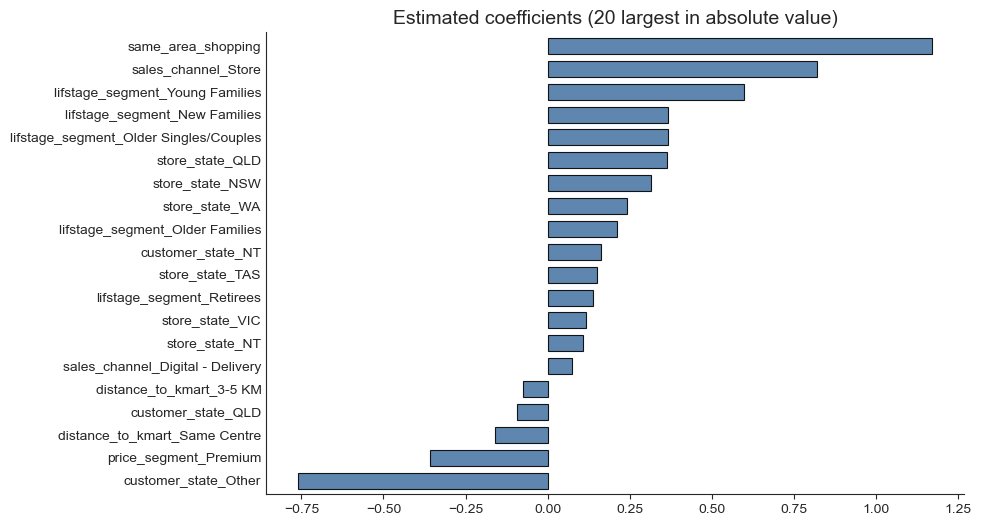

In [209]:
coefplot(final_model_lasso, X_train.columns)
#plt.savefig('la_c.png')
plt.show()

In [210]:
lasso_table_c = coef_table(final_model_lasso, X_train.columns)
lasso_table_c

,coef
co_location_flag,0.008
media_amount_spend,-0.0
Median income,0.0
population_2021,-0.0
same_area_shopping,1.171
year,0.061
month,0.032
sales_channel_Digital - Delivery,0.074
sales_channel_Store,0.82
customer_state_NSW,0.007


In [211]:
models.append('Lasso Regression')
rmse_list.append(rmse_lasso)
rmsle_list.append(rmsle_lasso)

In [212]:
lasso_table = eva_metric(['Lasso'], [rmse_lasso], [rmsle_lasso])
lasso_table

,RMSE,RMSLE
Lasso,2503.519,0.105


#### 4.2.1.3 Ridge Regression

Alpha: 8.859
RMSE: 2503.555
RMSLE: 0.105


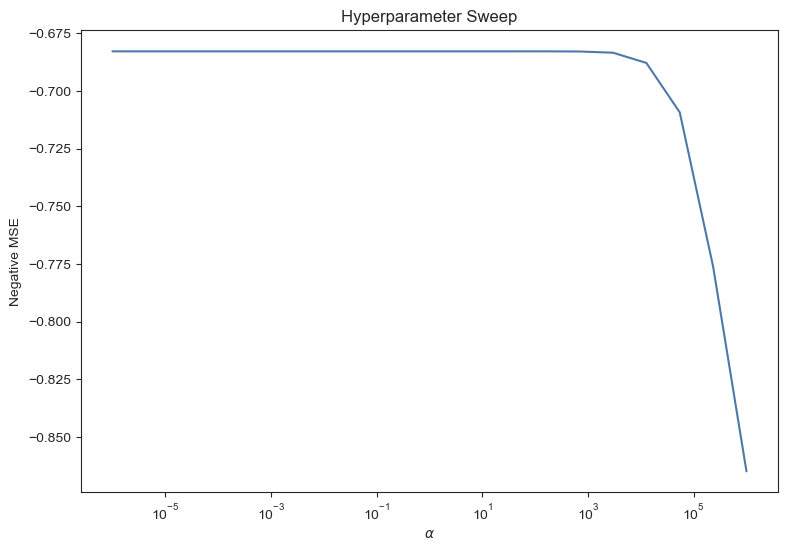

In [213]:


neg_mse_r = []
alphas = np.logspace(-6, 6, 20)
for alpha in alphas:
    model_r = Ridge(alpha = alpha)
    scores_mse_r = cross_val_score(model_r, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
    neg_mse_r.append(scores_mse_r.mean())

plt.figure()
plt.plot(alphas, neg_mse_r)
plt.title('Hyperparameter Sweep')
plt.xlabel(r'$\alpha$')
plt.ylabel('Negative MSE')
plt.xscale('log')
plt.savefig('plot.png')

best_alpha = alphas[np.argmax(neg_mse_r)]

final_model = Ridge(alpha = best_alpha)
final_model.fit(X_train, y_train)

#y_pred_r = np.exp(final_model.predict(X_valid_l))
#rmse_ridge = np.sqrt(mse(y_valid_l_original, y_pred_r))
y_pred_r = final_model.predict(X_valid)
#y_pred_r[y_pred_r<0] = 0
rmse_ridge = np.sqrt(mse(y_valid_original, np.exp(y_pred_r)))
rmsle_ridge = np.sqrt(msle(y_valid, y_pred_r))

print('Alpha: {:.3f}'.format(best_alpha))
print('RMSE: {:.3f}'.format(rmse_ridge))
print('RMSLE: {:.3f}'.format(rmsle_ridge))

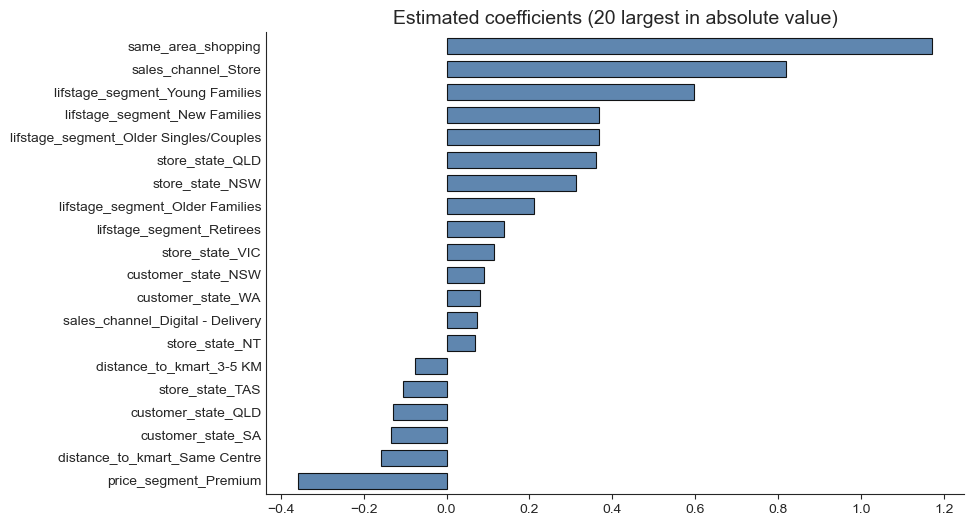

In [214]:
coefplot(final_model, X_train.columns)
#plt.savefig('rr_c.png')
plt.show()

In [215]:
ridge_table_c = coef_table(final_model, X_train.columns)
ridge_table_c

,coef
co_location_flag,0.008
media_amount_spend,-0.0
Median income,-0.0
population_2021,-0.0
same_area_shopping,1.171
year,0.061
month,0.032
sales_channel_Digital - Delivery,0.073
sales_channel_Store,0.82
customer_state_NSW,0.09


In [216]:
models.append('Ridge Regression')
rmse_list.append(rmse_ridge)
rmsle_list.append(rmsle_ridge)

In [217]:
ridge_table = eva_metric(['Ridge'], [rmse_ridge], [rmsle_ridge])
ridge_table

,RMSE,RMSLE
Ridge,2503.555,0.105


#### 4.2.1.4 Linear Model Summary

In [218]:
linear_table = eva_metric(models, rmse_list, rmsle_list)
linear_table

,RMSE,RMSLE
LinearRegression,2503.524,0.105
Lasso Regression,2503.519,0.105
Ridge Regression,2503.555,0.105


### 4.2.2 Tree-based Model

#### 4.2.2.1 Decision Tree

In [219]:
#Decision Tree hyperparamater search based on  train
%%time

decision_tree = DecisionTreeRegressor(random_state=0)

parameters = {'min_samples_leaf': np.arange(1, 30, 10),
              'max_features': np.arange(1, len(X_train.columns))}


random_search = RandomizedSearchCV(decision_tree,
                                   parameters, n_iter=30, cv=10,
                                   scoring='neg_mean_squared_error', random_state=42)

decision_tree_model = random_search.fit(X_train, y_train)

dtree_para = decision_tree_model.best_estimator_

print('Best parameters found by grid search:', dtree_para, '\n')

Best parameters found by grid search: DecisionTreeRegressor(max_features=19, min_samples_leaf=21, random_state=0) 

CPU times: total: 20min 37s
Wall time: 21min 32s


In [220]:
#find the best para and fit with trainset
%%time
final_dt = DecisionTreeRegressor(max_features=19, min_samples_leaf=21, random_state=0)
final_dt = final_dt.fit(X_train, y_train)
final_dt

CPU times: total: 4.2 s
Wall time: 4.41 s


DecisionTreeRegressor(max_features=19, min_samples_leaf=21, random_state=0)

In [221]:
#predict based on valid set
%%time
dt_predict = final_dt.predict(np.array(X_valid))
dt_predict

CPU times: total: 141 ms
Wall time: 156 ms


array([6.39406049, 6.64801178, 6.09403993, ..., 6.34650876, 7.07348582,
       6.31053681])

In [222]:
#caculate RMSE and RMSLE
%%time
dt_rmse = np.sqrt(mse(y_valid_original, np.exp(dt_predict)))
dt_rmsle = np.sqrt(msle(y_valid, dt_predict))


print('RMSE: {:.3f}'.format(dt_rmse))
print('RMSLE: {:.3f}'.format(dt_rmsle))

RMSE: 2245.305
RMSLE: 0.098
CPU times: total: 31.2 ms
Wall time: 18 ms


In [223]:
print(np.sum(final_dt.feature_importances_ != 0))

39


In [224]:
%%time
X_train.columns[final_dt.feature_importances_ != 0]

CPU times: total: 0 ns
Wall time: 999 µs


Index(['co_location_flag', 'media_amount_spend', 'Median income',
       'population_2021', 'same_area_shopping', 'year', 'month',
       'sales_channel_Digital - Delivery', 'sales_channel_Store',
       'customer_state_NSW', 'customer_state_NT', 'customer_state_QLD',
       'customer_state_SA', 'customer_state_TAS', 'customer_state_VIC',
       'customer_state_WA', 'price_segment_Mainstream',
       'price_segment_Premium', 'lifstage_segment_New Families',
       'lifstage_segment_Older Families',
       'lifstage_segment_Older Singles/Couples', 'lifstage_segment_Retirees',
       'lifstage_segment_Young Families',
       'lifstage_segment_Young Singles/Couples', 'store_state_NSW',
       'store_state_NT', 'store_state_QLD', 'store_state_SA',
       'store_state_TAS', 'store_state_VIC', 'store_state_WA',
       'distance_to_kmart_3-5 KM', 'distance_to_kmart_<1 KM',
       'distance_to_kmart_>5 KM', 'distance_to_kmart_Same Centre',
       'distance_to_target_3-5 KM', 'distance_to_targe

In [225]:
X_train.columns[final_dt.feature_importances_ == 0]

Index(['customer_state_Other'], dtype='object')

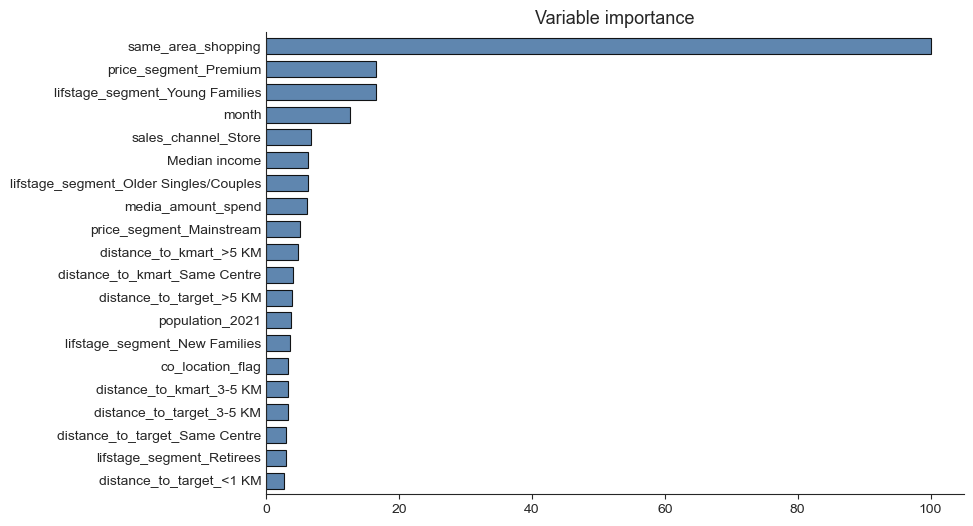

In [226]:
plot_feature_importance(final_dt, X_train.columns)
plt.savefig('dt_vi.png')
plt.show()

In [229]:
#display the tree
dot_data = export_graphviz(final_dt, max_depth = 4, impurity=False, feature_names=list(X_train.columns),rounded=True,filled=True)
dt_graph = graphviz.Source(dot_data)
dt_graph.render('DTTree.pdf')

'DTTree.pdf.pdf'

In [230]:
models.append('Decision Tree')
rmse_list.append(dt_rmse)
rmsle_list.append(dt_rmsle)

In [231]:
dt_table = eva_metric(['Decision Tree'], [dt_rmse], [dt_rmsle])
dt_table

,RMSE,RMSLE
Decision Tree,2245.305,0.098


#### 4.2.2.2 Bagging

In [232]:
#Bagging model hyperparamater search and fit by train
%%time

bag_para = {'n_estimators':np.arange(1, 51, 10)}

bag = BaggingRegressor(DecisionTreeRegressor(max_depth = 20, random_state = 42), n_estimators=np.arange(1, 51, 10), random_state=42)
bag_rs = RandomizedSearchCV(bag, bag_para, n_iter = 10, cv = 5, scoring='neg_mean_squared_error', random_state = 42)
bag_rs.fit(X_train, y_train)



CPU times: total: 45min 3s
Wall time: 49min 55s


RandomizedSearchCV(cv=5,
                   estimator=BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20,
                                                                              random_state=42),
                                              n_estimators=array([ 1, 11, 21, 31, 41]),
                                              random_state=42),
                   param_distributions={'n_estimators': array([ 1, 11, 21, 31, 41])},
                   random_state=42, scoring='neg_mean_squared_error')

In [233]:
%%time
best_bag = bag_rs.best_params_

CPU times: total: 0 ns
Wall time: 0 ns


In [234]:
%%time
final_bag =  BaggingRegressor(DecisionTreeRegressor(max_depth = 20, random_state = 42), **best_bag, random_state=42)

final_bag = final_bag.fit(X_train, y_train)
final_bag

CPU times: total: 3min 48s
Wall time: 4min 20s


BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20, random_state=42),
                 n_estimators=41, random_state=42)

In [235]:
%%time
bag_predict = final_bag.predict(np.array(X_valid))
bag_predict

CPU times: total: 4.64 s
Wall time: 5.5 s


array([5.99842495, 6.48477832, 6.0905411 , ..., 6.33476409, 7.22433648,
       6.22059125])

In [236]:
%%time

bag_rmse = np.sqrt(mse(y_valid_original, np.exp(bag_predict)))
bag_rmsle = np.sqrt(msle(y_valid, bag_predict))

print('RMSE: {:.3f}'.format(bag_rmse))
print('RMSLE: {:.3f}'.format(bag_rmsle))

RMSE: 2264.917
RMSLE: 0.099
CPU times: total: 15.6 ms
Wall time: 19.8 ms


In [237]:
models.append('Bagging')
rmse_list.append(bag_rmse)
rmsle_list.append(bag_rmsle)

In [238]:
bag_table = eva_metric(['Bagging'], [bag_rmse], [bag_rmsle])
bag_table

,RMSE,RMSLE
Bagging,2264.917,0.099


#### 4.2.2.3 Random Forest

In [239]:
%%time

rf_para = {'n_estimators': np.arange(1,50,10),
           'min_samples_leaf':np.arange(10, 50, 10),
           'max_features' : np.arange(1,len(X_train.columns))
           }

random_forest = RandomForestRegressor(random_state = 42)
rf_rs = RandomizedSearchCV(random_forest, rf_para, n_iter = 10, cv = 5, scoring = 'neg_mean_squared_error', random_state = 42)

rf_rs.fit(X_train, y_train)

CPU times: total: 1h 35s
Wall time: 1h 5min 29s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                                        'min_samples_leaf': array([10, 20, 30, 40]),
                                        'n_estimators': array([ 1, 11, 21, 31, 41])},
                   random_state=42, scoring='neg_mean_squared_error')

In [240]:
best_rf = rf_rs.best_params_

In [241]:
%%time
final_rf = RandomForestRegressor(random_state=42, **best_rf)
final_rf = final_rf.fit(X_train, y_train)
final_rf

CPU times: total: 1min 34s
Wall time: 1min 44s


RandomForestRegressor(max_features=20, min_samples_leaf=20, n_estimators=31,
                      random_state=42)

In [242]:
%%time
rf_predict = final_rf.predict(np.array(X_valid))
rf_predict

CPU times: total: 1.97 s
Wall time: 2.51 s


array([6.21737514, 6.4534618 , 6.14643025, ..., 6.39435199, 7.06256778,
       6.17797693])

In [243]:
%%time

rf_rmse = np.sqrt(mse(y_valid_original, np.exp(rf_predict)))
rf_rmsle = np.sqrt(msle(y_valid, rf_predict))


print('RMSE: {:.3f}'.format(rf_rmse))
print('RMSLE: {:.3f}'.format(rf_rmsle))

RMSE: 2232.248
RMSLE: 0.097
CPU times: total: 15.6 ms
Wall time: 19.6 ms


In [244]:
%%time
print(np.sum(final_rf.feature_importances_ != 0))
X_train.columns[final_rf.feature_importances_ != 0]

39
CPU times: total: 15.6 ms
Wall time: 29 ms


Index(['co_location_flag', 'media_amount_spend', 'Median income',
       'population_2021', 'same_area_shopping', 'year', 'month',
       'sales_channel_Digital - Delivery', 'sales_channel_Store',
       'customer_state_NSW', 'customer_state_NT', 'customer_state_QLD',
       'customer_state_SA', 'customer_state_TAS', 'customer_state_VIC',
       'customer_state_WA', 'price_segment_Mainstream',
       'price_segment_Premium', 'lifstage_segment_New Families',
       'lifstage_segment_Older Families',
       'lifstage_segment_Older Singles/Couples', 'lifstage_segment_Retirees',
       'lifstage_segment_Young Families',
       'lifstage_segment_Young Singles/Couples', 'store_state_NSW',
       'store_state_NT', 'store_state_QLD', 'store_state_SA',
       'store_state_TAS', 'store_state_VIC', 'store_state_WA',
       'distance_to_kmart_3-5 KM', 'distance_to_kmart_<1 KM',
       'distance_to_kmart_>5 KM', 'distance_to_kmart_Same Centre',
       'distance_to_target_3-5 KM', 'distance_to_targe

In [245]:
X_train.columns[final_rf.feature_importances_ == 0]

Index(['customer_state_Other'], dtype='object')

In [246]:
final_rf.feature_importances_.max()

0.4246863691171125

In [247]:
final_rf.feature_importances_

array([1.19953736e-02, 3.98444561e-02, 2.47903170e-02, 1.68842707e-02,
       4.24686369e-01, 9.55500034e-03, 5.64287737e-02, 3.32090153e-04,
       3.86774376e-02, 2.89614869e-03, 8.28313197e-04, 0.00000000e+00,
       4.94073601e-03, 4.37825767e-03, 1.21498608e-03, 4.56907049e-03,
       2.60211234e-03, 2.17657089e-02, 5.77562121e-02, 1.54494923e-02,
       9.34556449e-03, 2.51917766e-02, 1.28841039e-02, 5.94112699e-02,
       1.30631595e-02, 5.02408312e-03, 8.65451944e-04, 5.10031942e-03,
       4.22038022e-03, 1.13796065e-03, 5.19483097e-03, 2.76523042e-03,
       1.52455564e-02, 8.26784242e-03, 1.77158617e-02, 2.15140843e-02,
       1.43095502e-02, 1.07498322e-02, 1.59787632e-02, 1.24192523e-02])

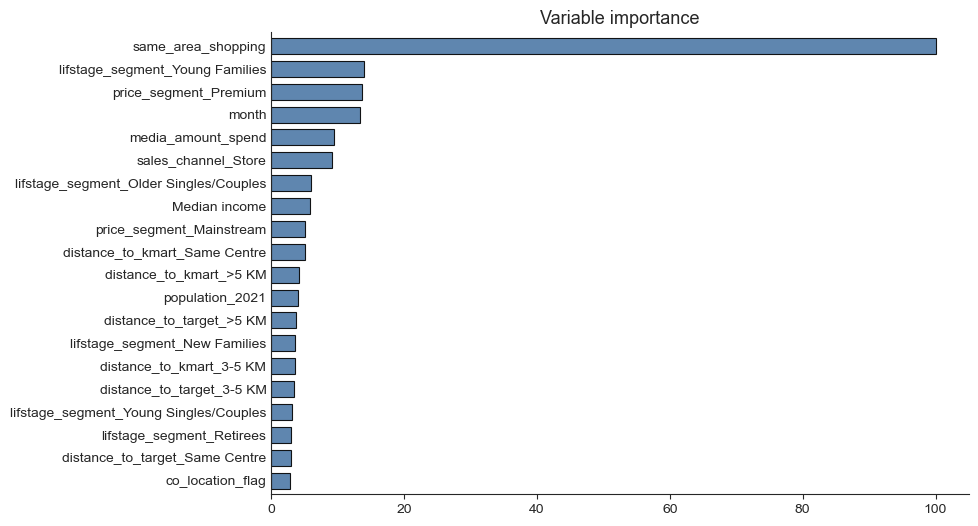

CPU times: total: 297 ms
Wall time: 382 ms


In [248]:
%%time
plot_feature_importance(final_rf, X_train.columns)
plt.savefig('rf_vi.png')
plt.show()

In [249]:
models.append('Random Forest')
rmse_list.append(rf_rmse)
rmsle_list.append(rf_rmsle)

In [250]:
rf_table = eva_metric(['Random Forest'], [rf_rmse], [rf_rmsle])
rf_table

,RMSE,RMSLE
Random Forest,2232.248,0.097


#### 4.2.2.4 XGBoosting

In [251]:
%%time

X_train_xgb = X_train.to_numpy()
X_valid_xgb = X_valid.to_numpy()

y_train_xgb = y_train.to_numpy()
y_valid_xgb = y_valid.to_numpy()
y_valid_x_original = y_valid_original.to_numpy()

xgb_para={'learning_rate': [0.01, 0.05, 0.1],
          'max_depth': [3,5,7,9],
          'n_estimators': [10,20,30,50],
          'subsample' : [0.5, 0.8]
          }
xgbst = xgb.XGBRegressor(objective='reg:squarederror',    reg_lambda=0.5, random_state = 42)
xgbst_rs = RandomizedSearchCV(xgbst, xgb_para, n_iter = 10, cv = 5, random_state = 42, scoring='neg_mean_squared_error')

# n_estimators: number of trees
# subsample: fraction of observations used to fit each tree
# reg_lambda: L2 regularisation penalty
# reg_alpha: L1 regularisation penalty
# colsample_bytree: fraction of features considered for each tree (alternatives: bylevel, bynode)
# min_child_weight: approximately equal to the minimum number of samples in each node

xgbst_rs.fit(X_train_xgb, y_train_xgb)

CPU times: total: 2h 39s
Wall time: 8min 16s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [10, 20, 30, 50],
                                        'subsample': [0.5, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error')

In [252]:
%%time
best_xgb = xgbst_rs.best_params_
best_xgb

CPU times: total: 0 ns
Wall time: 0 ns


{'subsample': 0.5, 'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.1}

In [253]:

final_xgb =  xgb.XGBRegressor(objective='reg:squarederror',  reg_lambda=0.5, random_state = 42, **best_xgb)

final_xgb = final_xgb.fit(X_train_xgb, y_train_xgb)
final_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [254]:
%%time
xgb_predict = final_xgb.predict(np.array(X_valid_xgb))
xgb_predict

CPU times: total: 1.59 s
Wall time: 142 ms
Parser   : 219 ms


array([6.290016 , 6.3390417, 6.3869267, ..., 6.5533986, 6.83278  ,
       6.231402 ], dtype=float32)

In [255]:
%%time

xgb_rmse = np.sqrt(mse(y_valid_original, np.exp(xgb_predict)))
xgb_rmsle = np.sqrt(msle(y_valid, xgb_predict))

print('RMSE: {:.3f}'.format(xgb_rmse))
print('RMSLE: {:.3f}'.format(xgb_rmsle))

RMSE: 2292.900
RMSLE: 0.097
CPU times: total: 172 ms
Wall time: 27.5 ms


In [256]:
%%time
print(np.sum(final_xgb.feature_importances_ != 0))
X_train.columns[final_xgb.feature_importances_ != 0]

36
CPU times: total: 15.6 ms
Wall time: 3.99 ms


Index(['co_location_flag', 'media_amount_spend', 'Median income',
       'population_2021', 'same_area_shopping', 'year', 'month',
       'sales_channel_Digital - Delivery', 'sales_channel_Store',
       'customer_state_NSW', 'customer_state_QLD', 'customer_state_SA',
       'customer_state_VIC', 'customer_state_WA', 'price_segment_Mainstream',
       'price_segment_Premium', 'lifstage_segment_New Families',
       'lifstage_segment_Older Families',
       'lifstage_segment_Older Singles/Couples', 'lifstage_segment_Retirees',
       'lifstage_segment_Young Families',
       'lifstage_segment_Young Singles/Couples', 'store_state_NSW',
       'store_state_NT', 'store_state_QLD', 'store_state_SA',
       'store_state_VIC', 'store_state_WA', 'distance_to_kmart_3-5 KM',
       'distance_to_kmart_<1 KM', 'distance_to_kmart_>5 KM',
       'distance_to_kmart_Same Centre', 'distance_to_target_3-5 KM',
       'distance_to_target_<1 KM', 'distance_to_target_>5 KM',
       'distance_to_target_Same

In [257]:
X_train.columns[final_xgb.feature_importances_ == 0]

Index(['customer_state_NT', 'customer_state_Other', 'customer_state_TAS',
       'store_state_TAS'],
      dtype='object')

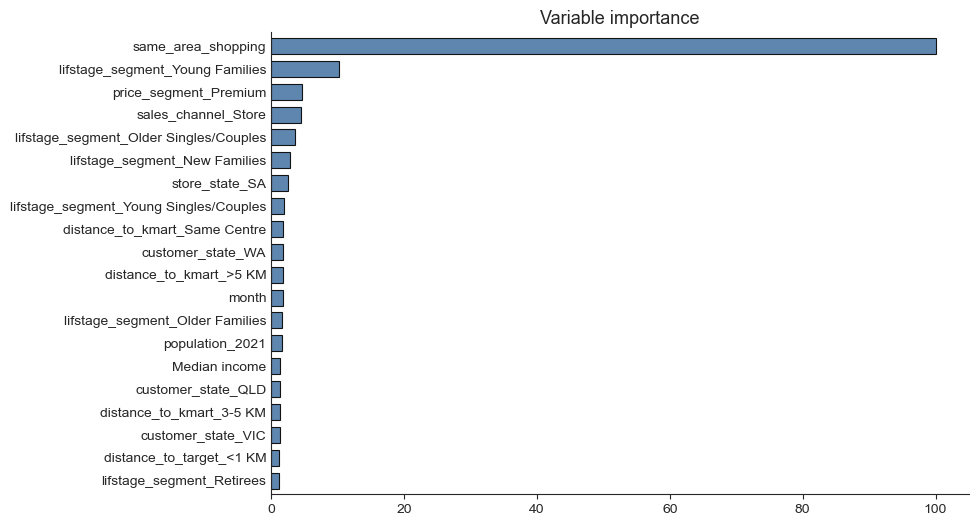

CPU times: total: 281 ms
Wall time: 338 ms


In [258]:
%%time
plot_feature_importance(final_xgb, X_train.columns)
plt.savefig('xgb_vi.png')
plt.show()

In [259]:
models.append('XGBoost')
rmse_list.append(xgb_rmse)
rmsle_list.append(xgb_rmsle)

In [260]:
xgb_table = eva_metric(['XGBoost'], [xgb_rmse], [xgb_rmsle])
xgb_table

,RMSE,RMSLE
XGBoost,2292.9,0.097


#### 4.2.2.5 Tree-based Model Summary

In [261]:
tree_table = eva_metric(models[3:], rmse_list[3:], rmsle_list[3:])
tree_table

,RMSE,RMSLE
Decision Tree,2245.305,0.098
Bagging,2264.917,0.099
Random Forest,2232.248,0.097
XGBoost,2292.9,0.097


## 5. Model Evaluation

### 5.1 Model RMSE & RMSLE Summary

In [262]:
metric_table = eva_metric(models, rmse_list, rmsle_list)
metric_table

,RMSE,RMSLE
LinearRegression,2503.524,0.105
Lasso Regression,2503.519,0.105
Ridge Regression,2503.555,0.105
Decision Tree,2245.305,0.098
Bagging,2264.917,0.099
Random Forest,2232.248,0.097
XGBoost,2292.9,0.097


### 5.2 Final Model

In [265]:
final_rf = final_rf.fit(dummy_train.drop(['total_sale_value_x', 'log_totalvalue'], axis = 1), dummy_train['log_totalvalue'])

In [266]:
#Fit the model with the lowest rmse with test data to get the final rmse
final_predict= final_rf.predict(dummy_test.drop(['total_sale_value_x', 'log_totalvalue'], axis = 1))


In [267]:
final_model_rmse = np.sqrt(mse(dummy_test['total_sale_value_x'], np.exp(final_predict)))
final_model_rmsle = np.sqrt(msle(dummy_test['log_totalvalue'], final_predict))

print('Final Model - Random Forest')
print('RMSE: {:.3f}'.format(final_model_rmse))
print('RMSLE: {:.3f}'.format(final_model_rmsle))

Final Model - Random Forest
RMSE: 2266.369
RMSLE: 0.097


-------------------------------------- End of Assignment2 ------------------------------